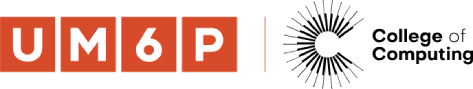

* **by** :
Othmane OUKBIL \
* **Supervisor and first examiner** :
Pr. Imad ELMAHI \
* **Department**:
College of Computing
* **Formation** : Quantitative and financial modeling
* **Option** : Modeling

# Numerical Study of 1D Conservation Laws using Finite Volume Methods

This notebook presents a numerical study of 1D conservation laws using finite volume methods.
The implemented numerical schemes include:
- Lax-Friedrichs
- Upwind
- Lax-Wendroff
- Roe’s Scheme

We consider two test cases:
1. Linear Advection Equation: $\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$
2. Nonlinear Burgers’ Equation: $\frac{\partial u}{\partial t} + \frac{\partial (u^2 / 2)}{\partial x} = 0$

The results are compared to the exact solution, and errors are computed using the L2 norm.

## Importing Libraries




In [51]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Advection Equation






### Problem Setup
- **Domain:** $x \in [0,6]$
- **Transport Speed:** $c = 2$ m/s
- **Initial Condition:**
\begin{equation}
  u_0(x) = \begin{cases}
    1, & \text{if } 0.5 \leq x \leq 1.5 \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

- **Boundary Conditions:** Periodic at $x = 0$, Neumann at $x = 6$
- **Time Integration:** \begin{equation}
  T_{advection} = 0.5
\end{equation}

\begin{equation}
  \Delta t = 0.8 \frac{\Delta x}{c}
\end{equation}

\begin{equation}
  \text{Number of steps} = \frac{T_{advection}}{\Delta t}
\end{equation}

In [52]:
# Parameters for advection
c = 2.0
xmin, xmax = 0.0, 6.0
N = 200  # Number of cells
dx = (xmax - xmin) / N
x = np.linspace(xmin + 0.5*dx, xmax - 0.5*dx, N)  # Cell centers

# Initial condition
u0_advection = np.where((x >= 0.5) & (x <= 1.5), 1.0, 0.0)

# Time parameters
T_advection = 0.5
dt_advection = 0.8 * dx / c  # CFL condition
num_steps_advection = int(T_advection / dt_advection)

# Boundary conditions for advection
def apply_bcs_advection(u):
    u_ext = np.zeros(len(u) + 2)
    u_ext[1:-1] = u
    u_ext[0] = u[-1]  # Periodic (left)
    u_ext[-1] = u[-1]  # Neumann (right)
    return u_ext

###Implementation of Numerical Schemes for Advection



1. Lax friedrichs :


\begin{equation}
    F_{i+1/2} = \frac{1}{2} c (u_{i} + u_{i+1}) - \frac{1}{2} \frac{\Delta x}{\Delta t} (u_{i+1} - u_{i})
\end{equation}

\begin{equation}
    u^{n+1}_i = u^n_i - \frac{\Delta t}{\Delta x} (F_{i+1/2} - F_{i-1/2})
\end{equation}

In [53]:
def step_lax_friedrichs(u, c, dx, dt):
    u_ext = apply_bcs_advection(u)
    flux = 0.5 * c * (u_ext[:-1] + u_ext[1:]) - 0.5 * (dx/dt) * (u_ext[1:] - u_ext[:-1])
    u_nouveau = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_nouveau

2. Upwind :
\begin{equation}
    F_{i} = c u_{i}
\end{equation}

\begin{equation}
    u^{n+1}_i = u^n_i - \frac{\Delta t}{\Delta x} (F_{i} - F_{i-1})
\end{equation}

In [54]:
def step_upwind(u, c, dx, dt):
    u_ext = apply_bcs_advection(u)
    flux = c * u_ext[:-1]
    u_nouveau = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_nouveau

3. Lax wendroff
\begin{equation}
    F_{i+1/2} = c \frac{(u_{i} + u_{i+1})}{2} - \frac{c^2 \Delta t}{2 \Delta x} (u_{i+1} - u_{i})
\end{equation}

\begin{equation}
    u^{n+1}_i = u^n_i - \frac{\Delta t}{\Delta x} (F_{i+1/2} - F_{i-1/2})
\end{equation}

In [55]:
def step_lax_wendroff(u, c, dx, dt):
    u_ext = apply_bcs_advection(u)
    flux = c * 0.5 * (u_ext[:-1] + u_ext[1:]) - (c**2 * dt)/(2*dx) * (u_ext[1:] - u_ext[:-1])
    u_nouveau = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_nouveau

4. Roe : It's the same as the upwind for the **advection**



In [56]:
def step_roe(u, c, dx, dt):
    return step_upwind(u, c, dx, dt)

### Solving the Advection Equation

In [57]:

schemas_advection = {
    'Lax-Friedrichs': lambda u: step_lax_friedrichs(u, c, dx, dt_advection),
    'Upwind': lambda u: step_upwind(u, c, dx, dt_advection),
    'Lax-Wendroff': lambda u: step_lax_wendroff(u, c, dx, dt_advection),
    'Roe': lambda u: step_roe(u, c, dx, dt_advection)
}

solutions_advection = {}
for name, schema in schemas_advection.items():
    u = u0_advection.copy()
    for _ in range(num_steps_advection):
        u = schema(u)
    solutions_advection[name] = u

### Exact Solution for Advection






In [58]:

def exact_advection(x, t):
    x0 = (x - c * t) % 6.0  # Condition périodique
    return np.where((x0 >= 0.5) & (x0 <= 1.5), 1.0, 0.0)

exact_u_advection = exact_advection(x, T_advection)

### Plotting the Results for Advection






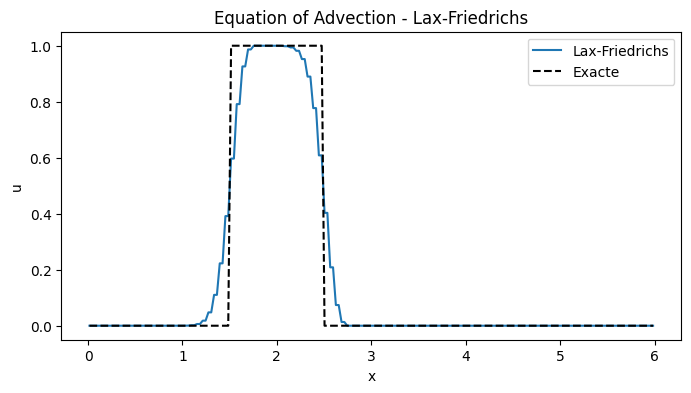

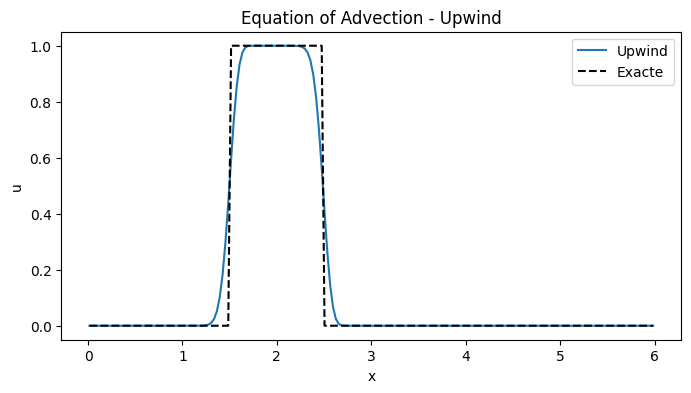

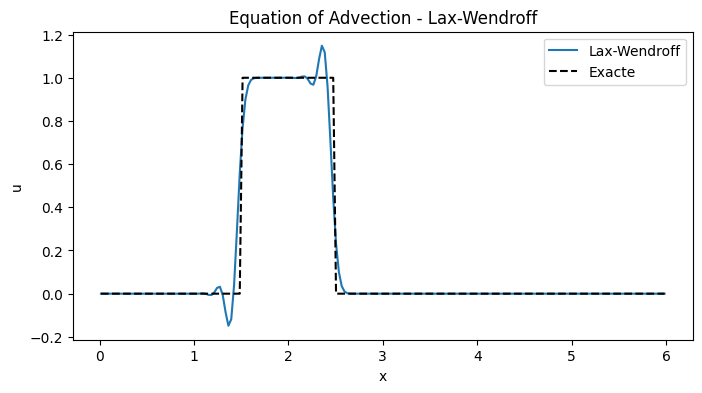

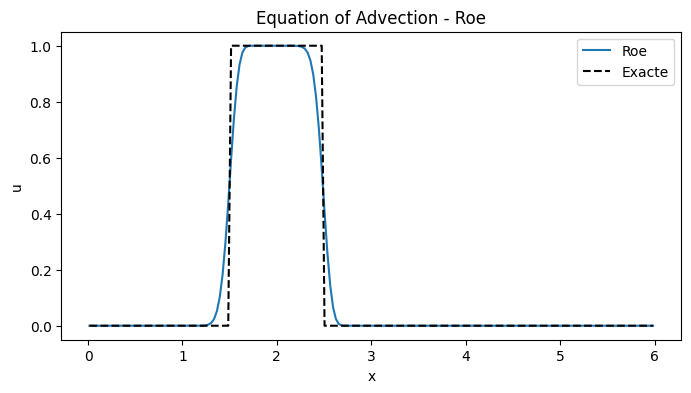

In [59]:
for nom, sol in solutions_advection.items():
    plt.figure(figsize=(8, 4))
    plt.plot(x, sol, label=nom)
    plt.plot(x, exact_u_advection, 'k--', label='Exacte')
    plt.title(f'Equation of Advection - {nom}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.show()

### L2 errors for Advection

In [60]:
def l2_error(u_num, u_exact, dx):
    return np.sqrt(np.sum((u_num - u_exact)**2) * dx)

for nom, err in solutions_advection.items():
    print(f"{nom}: {l2_error(err, exact_u_advection, dx):.4f}")

Lax-Friedrichs: 0.2270
Upwind: 0.1875
Lax-Wendroff: 0.1743
Roe: 0.1875


## 2. Burgers’ Equation




### Problem Setup
- **Domain:** $x \in [0,6]$
- **Initial Condition:** $$
u_0(x) =
\begin{cases}
0.4, & \text{if } x_b \leq 2.0 \\
0.1, & \text{otherwise}
\end{cases}
$$
- **Boundary Conditions:** Dirichlet at $x = 0$, Neumann at $x = 6$
- **Time Integration:**
$$ T_{\text{burgers}} = 2.0 $$
$$ \text{max_speed} = 0.4 $$
$$ \Delta t_{\text{burgers}} = 0.8 \frac{\Delta x_b}{\text{max_speed}} $$

$$\text{Number of steps} = \left\lfloor \frac{T_{\text{burgers}}}{\Delta t_{\text{burgers}}} \right\rfloor $$



In [61]:
# Paramètres pour Burgers
xmin_b, xmax_b = 0.0, 6.0
N_b = 200
dx_b = (xmax_b - xmin_b) / N_b
x_b = np.linspace(xmin_b + 0.5*dx_b, xmax_b - 0.5*dx_b, N_b)

# Condition initiale
u0_burgers = np.where(x_b <= 2.0, 0.4, 0.1)

# Paramètres temporels
T_burgers = 2.0
max_speed = 0.4
dt_burgers = 0.8 * dx_b / max_speed
num_steps_burgers = int(T_burgers / dt_burgers)

# Boundary conditions for Burgers
def apply_bcs_burgers(u):
    u_ext = np.zeros(len(u) + 2)
    u_ext[1:-1] = u
    u_ext[0] = 0.4  # Dirichlet (left)
    u_ext[-1] = u[-1]  # Neumann (right)
    return u_ext

### Lax-Friedrichs Scheme for Burgers' Equation

The **Lax-Friedrichs numerical flux** for Burgers' equation is given by:

#### **Numerical Flux Computation**
For Burgers' equation:
$$
F(u) = \frac{1}{2} u^2
$$

The numerical flux at the interface is computed as:

$$
F_{j+1/2} = \frac{1}{2} \left( F_j + F_{j+1} \right) - \frac{1}{2} \frac{\Delta x}{\Delta t} (u_{j+1} - u_j)
$$

where:
- $$ F_j = \frac{1}{2} u_j^2 $$
-$$ F_{j+1} = \frac{1}{2} u_{j+1}^2 $$

---

#### **Time Stepping Update**
Using the computed flux, the update step for **Lax-Friedrichs** is given by:

$$
u_j^{n+1} = u_j^n - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$

where:
- $$u_{\text{ext}} \text{ represents the solution extended with boundary conditions.}$$
- $$ F_{j+1/2} \text{ is computed from the previous step.}$$

The final update is:

$$
u^{n+1} = u_{\text{ext}, 1:-1} - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$


In [62]:
def lax_friedrichs_flux_burgers(u, dx, dt):
    F = 0.5 * u[:-1]**2
    F_jp1 = 0.5 * u[1:]**2
    flux = 0.5 * (F + F_jp1) - 0.5 * (dx/dt) * (u[1:] - u[:-1])
    return flux
def step_lax_friedrichs_burgers(u, dx, dt):
    u_ext = apply_bcs_burgers(u)
    flux = lax_friedrichs_flux_burgers(u_ext, dx, dt)
    u_new = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_new

### Upwind Scheme for Burgers' Equation

The **upwind numerical flux** is computed using the **Roe average velocity**:

#### **Roe Average Velocity:**
The Roe average velocity at the interface ( j + 1/2 )  is given by:

$$
a_{j+1/2} = \frac{1}{2} \left( u_j + u_{j+1} \right)
$$

#### **Flux Computation:**
The numerical flux at the interface is determined using the upwind principle:

$$
F_{j+1/2} =
\begin{cases}
F_j, & \text{if } a_{j+1/2} \geq 0 \\
F_{j+1}, & \text{otherwise}
\end{cases}
$$

where:
- $$ F_j = \frac{1}{2} u_j^2 $$
- $$F_{j+1} = \frac{1}{2} u_{j+1}^2 $$

---

#### **Time Stepping Update**
Using the computed flux, the update step for the **Upwind Scheme** is given by:

$$
u_j^{n+1} = u_j^n - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$

where:
- $$ u_{\text{ext}} \text{ represents the solution extended with boundary conditions.}$$
- $$ F_{j+1/2} \text{ is computed from the previous step.}$$

The final update is:

$$
u^{n+1} = u_{\text{ext}, 1:-1} - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$


In [63]:

def upwind_flux_burgers(u):
    a = 0.5 * (u[:-1] + u[1:])  # Roe average
    F_j = 0.5 * u[:-1]**2
    F_jp1 = 0.5 * u[1:]**2
    return np.where(a >= 0, F_j, F_jp1)

def step_upwind_burgers(u, dx, dt):
    u_ext = apply_bcs_burgers(u)
    flux = upwind_flux_burgers(u_ext)
    u_new = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_new

### Lax-Wendroff Scheme for Burgers' Equation

The **Lax-Wendroff scheme** is a second-order method that introduces a predictor-corrector approach for improved accuracy.

#### **Numerical Flux Computation**
For Burgers' equation:

$$
F(u) = \frac{1}{2} u^2
$$

The intermediate state \( u^* \) is computed as:

$$
u^* = \frac{1}{2} \left( u_j + u_{j+1} \right) - \frac{\Delta t}{2 \Delta x} \left(F_{j+1} - F_j\right)
$$

where:
- $$F_j = \frac{1}{2} u_j^2 $$
- $$F_{j+1} = \frac{1}{2} u_{j+1}^2 $$

The numerical flux is then:

$$
F_{j+1/2} = \frac{1}{2} u^{*2}
$$

---

#### **Time Stepping Update**
Using the computed flux, the update step for the **Lax-Wendroff scheme** is given by:

$$
u_j^{n+1} = u_j^n - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$

where:
- $$u_{\text{ext}} \text{ represents the solution extended with boundary conditions.}$$
- $$F_{j+1/2} \text{ is computed from the previous step.}$$

The final update is:

$$
u^{n+1} = u_{\text{ext}, 1:-1} - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$


In [64]:
def lax_wendroff_flux_burgers(u, dx, dt):
    F_j = 0.5 * u[:-1]**2
    F_jp1 = 0.5 * u[1:]**2
    u_star = 0.5*(u[:-1] + u[1:]) - (dt/(2*dx)) * (F_jp1 - F_j)
    return 0.5 * u_star**2

def step_lax_wendroff_burgers(u, dx, dt):
    u_ext = apply_bcs_burgers(u)
    flux = lax_wendroff_flux_burgers(u_ext, dx, dt)
    u_new = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_new

### Roe Scheme for Burgers' Equation

The **Roe scheme** is an approximate Riemann solver that uses the Roe average to determine the numerical flux.

#### **Roe Average Velocity:**
The **Roe average velocity** at the interface $ j +1/2 $ is given by:

$$
a_{j+1/2} = \frac{1}{2} \left( u_j + u_{j+1} \right)
$$

#### **Numerical Flux Computation:**
The Roe flux is determined using the upwind principle:

$$
F_{j+1/2} =
\begin{cases}
F_j, & \text{if } a_{j+1/2} \geq 0 \\
F_{j+1}, & \text{otherwise}
\end{cases}
$$

where:
- $$ F_j = \frac{1}{2} u_j^2 $$
- $$ F_{j+1} = \frac{1}{2} u_{j+1}^2 $$

---

#### **Time Stepping Update**
Using the computed flux, the update step for the **Roe Scheme** is given by:

$$
u_j^{n+1} = u_j^n - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$

where:
- $ u_{\text{ext}}$ represents the solution extended with boundary conditions.
- $ F_{j+1/2} $ is computed from the previous step.

The final update is:

$$
u^{n+1} = u_{\text{ext}, 1:-1} - \frac{\Delta t}{\Delta x} \left(F_{j+1/2} - F_{j-1/2}\right)
$$


In [65]:

def roe_flux_burgers(u):
    a = 0.5 * (u[:-1] + u[1:])
    F_j = 0.5 * u[:-1]**2
    F_jp1 = 0.5 * u[1:]**2
    return np.where(a >= 0, F_j, F_jp1)

def step_roe_burgers(u, dx, dt):
    u_ext = apply_bcs_burgers(u)
    flux = roe_flux_burgers(u_ext)
    u_new = u_ext[1:-1] - (dt/dx) * (flux[1:] - flux[:-1])
    return u_new

### Solve Burgers for all schemes



In [66]:

schemes_burgers = {
    'Lax-Friedrichs': lambda u: step_lax_friedrichs_burgers(u, dx_b, dt_burgers),
    'Upwind': lambda u: step_upwind_burgers(u, dx_b, dt_burgers),
    'Lax-Wendroff': lambda u: step_lax_wendroff_burgers(u, dx_b, dt_burgers),
    'Roe': lambda u: step_roe_burgers(u, dx_b, dt_burgers)
}
solutions_burgers = {}
for name, scheme in schemes_burgers.items():
    u = u0_burgers.copy()
    for _ in range(num_steps_burgers):
        u = scheme(u)
    solutions_burgers[name] = u

### Exact solution for Burgers

In [67]:
def exact_burgers(x, t):
    shock_pos = 2 + 0.25 * t
    return np.where(x < shock_pos, 0.4, 0.1)

exact_u_burgers = exact_burgers(x_b, T_burgers)

### Plotting the Results for Burgers


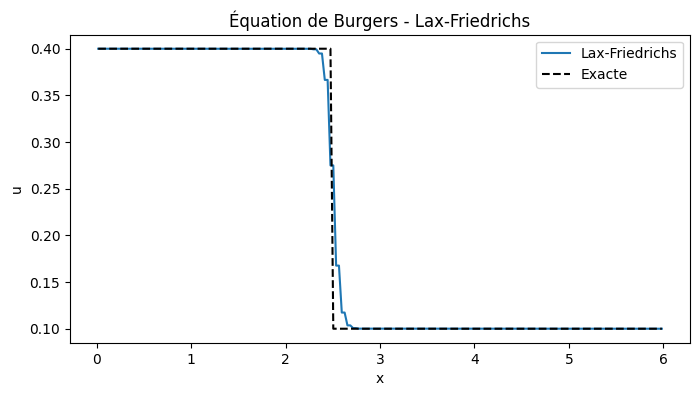

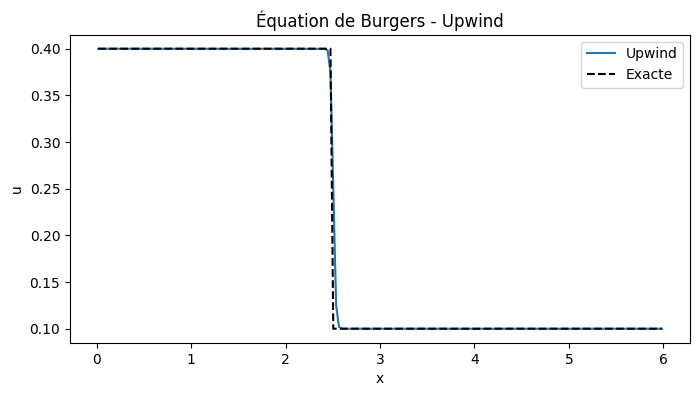

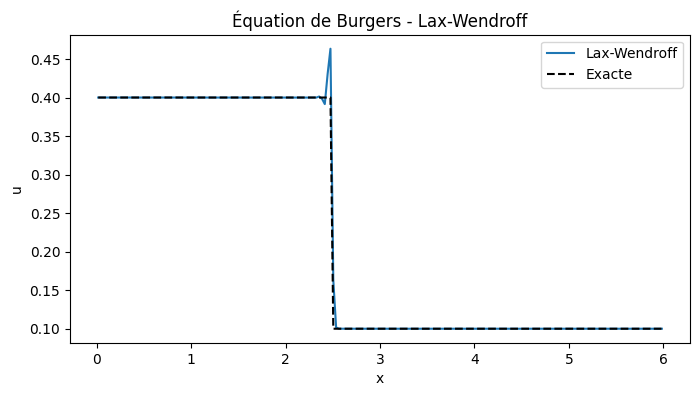

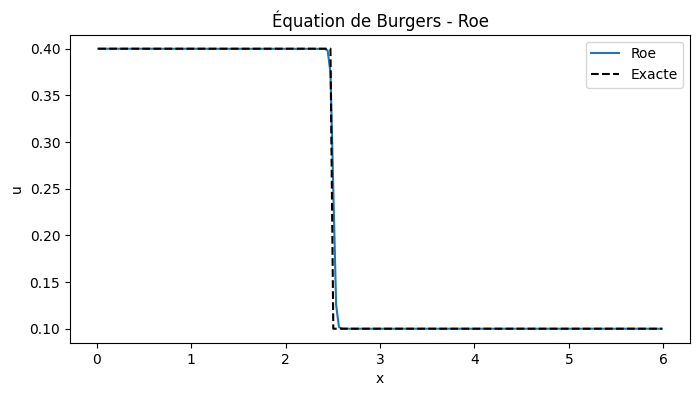

In [68]:
for nom, sol in solutions_burgers.items():
    plt.figure(figsize=(8, 4))
    plt.plot(x_b, sol, label=nom)
    plt.plot(x_b, exact_u_burgers, 'k--', label='Exacte')
    plt.title(f'Équation de Burgers - {nom}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.show()

### L2 errors for Burgers


In [69]:

for nom, err in solutions_burgers.items():
    print(f"{nom}: {l2_error(err, exact_u_burgers, dx_b):.4f}")

Lax-Friedrichs: 0.0418
Upwind: 0.0267
Lax-Wendroff: 0.0165
Roe: 0.0267


# Conclusion
- Lax-Friedrichs is simple but highly diffusive.
- Upwind reduces diffusion but lacks sharpness.
- Lax-Wendroff provides high accuracy but exhibits oscillations near discontinuities.
- Roe’s Scheme balances accuracy and stability well, particularly for Burgers’ equation.

This study highlights the trade-offs between accuracy and numerical stability in solving hyperbolic conservation laws.